In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler as SS
from joblib import dump
from config_store import targetDataSet
from utility_functions import dataSetSplit, doKFold, score

In [2]:
# Import and preview data set
data = pd.read_csv(targetDataSet)
data.head()

,Website,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Duration,Bits/s A → B,Bits/s B → A
0,0,1,712,1,712,0,0,16.763719,339,0
1,0,1,718,1,718,0,0,10.784664,532,0
2,0,1,889,1,889,0,0,4.927569,1443,0
3,0,1,712,1,712,0,0,13.479684,422,0
4,0,1,718,1,718,0,0,12.706807,452,0


In [3]:
# Separate data set using test/train split
XTrain, XTest, yTrain, yTest = dataSetSplit(data.drop(columns = ["Website"]).values, data["Website"].values)

# Scale data
ss = SS()
XTrainScaled = ss.fit_transform(XTrain)
XTestScaled = ss.transform(XTest)

In [4]:
# Perform k-fold to optimize k hyperparameter
neighborRange = np.array(range(1, 21))

# Hold k-fold result for each possible k neighbor value
train = []
test = []

# Perform k-fold for each possible hyperparameter value
for neighbor in neighborRange:
    knn = KNN(n_neighbors = neighbor)
    trainResult, testResult = doKFold(knn, XTrainScaled, yTrain)
    
    train.append(np.mean(trainResult))
    test.append(np.mean(testResult))

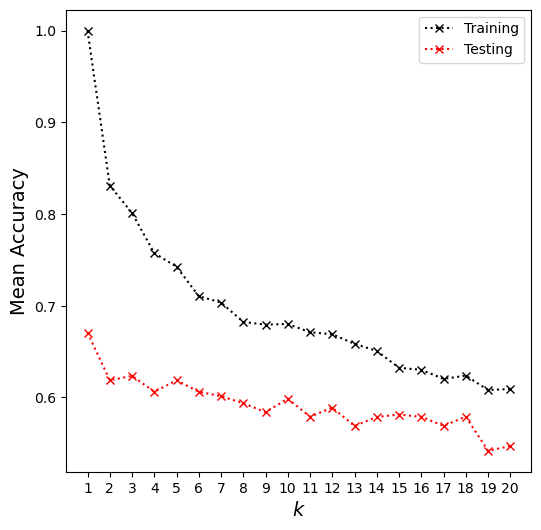

In [5]:
plt.figure(figsize = (6, 6))
plt.plot(neighborRange, train, ":xk", label = "Training")
plt.plot(neighborRange, test, ":xr", label = "Testing")
plt.ylabel("Mean Accuracy", fontsize = 14)
plt.xlabel("$k$",fontsize = 14)
plt.xticks(neighborRange)
plt.legend()
plt.show()

In [6]:
# Get optimal hyperparameter for KNN
maxIndex = (test == np.max(test))
print(neighborRange[maxIndex])
print(np.max(test))
print(np.max(train))

[1]
0.6706707317073171
1.0


In [7]:
# Final KNN model
knn = KNN(n_neighbors = neighborRange[maxIndex][0])
knn.fit(XTrainScaled, yTrain)

KNeighborsClassifier(n_neighbors=1)

In [8]:
# Score model
score(knn, XTrainScaled, yTrain, XTestScaled, yTest)

Training score: 1.0
Testing score: 0.6568627450980392


In [9]:
# Save model
dump(knn, "models/knn.joblib")

['models/knn.joblib']